# Assignment: Geom1B
For this problem set, we'll be using a Jupyter notebook. 

**Few Important Things:**
 - Save this file as geo1_emailuser_attempt#_assignment (e.g. geo1_mmann1123_attempt1_geom1B.ipynb)
 - Before submitting make sure to go to Cell > Run All and confirm there are no errors thrown.
 - If you can't figure something out, that is ok, do your best and share it


---
## Problem 1: Creating basic geopandas objects

### Part A: Points (2 Points)
Refer back to your reading on [creating new vector data in geopandas](https://pygis.io/docs/c_new_vectors.html#creating-geospatial-vector-data) or maybe better [geodataframe examples from gpd](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html)


Create a function called `createPointGpd` that has parameters `x_coord` and `y_coord` that take numeric data as arguments, and returns a geopandas GeoDataFrame with a projection of WGS 1984 geographic lat lon (i.e. EPSG code 4326). 


In [17]:
# import required modules and functions
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString
import geopandas as gpd
def createPointGpd(x_coord, y_coord):
     """ Returns a geopandas GeoDataFrame object
     """
     point = Point(x_coord, y_coord)
    
     gdf = gpd.GeoDataFrame({'geometry': [point]}, crs="EPSG:4326")  
    
     return gdf



Your function should return a `GeoDataFrame` object containing one point. Check that is does:

*Do not change cell below*

In [18]:
"""Run the following: you should get no errors"""
from geopandas import GeoDataFrame
try:
    assert isinstance(createPointGpd(10, -10), GeoDataFrame) 
except AssertionError:
    raise AssertionError("Your object is not of type GeoDataFrame")

try:
    assert createPointGpd(10, -10).crs.srs == 'EPSG:4326'
except AssertionError:
    raise AssertionError("The crs has not been properly assigned")

In [19]:
"""Run the following: you should get no errors"""
try:
    assert createPointGpd(10, -10).shape == (1,1)
except AssertionError:
    raise AssertionError("Your point object doesn't have the correct shape")

try:
    assert createPointGpd(10, -10).columns == ['geometry'] # shouldn't have any attribute data yet
except AssertionError:
    raise AssertionError("The only column in your geodataframe should be 'geometry'")

In [20]:
"""Additional hidden tests"""


'Additional hidden tests'

In [21]:
"""Additional hidden tests"""


'Additional hidden tests'

### Part A: Polys (2 Points)
Now create a function called `createPolyGpd` that creates a polgon from a list of coordinate pairs and assigns a crs of WGS 1984 lat lon.  

In [22]:
def createPolyGpd(a_list_of_coord_pairs):
    """ Returns a geopandas GeoDataFrame object
    """
    # YOUR CODE HERE

    poly = Polygon(a_list_of_coord_pairs)
    gdf = gpd.GeoDataFrame({'geometry': [poly]}, crs="EPSG:4326")  
    
    return gdf
    return poly



In [23]:
"""Run the following: you should get no errors"""
from geopandas import GeoDataFrame

try:
    assert isinstance(createPolyGpd([(0,0),(0,1),(1,1),(1,0)]), GeoDataFrame) 
except AssertionError:
    raise AssertionError("The function return should be of type GeoDataFrame")

In [24]:
"""Run the following: you should get no errors"""
dd = gpd.GeoDataFrame({'geometry': [Polygon([(0,0),(0,1),(1,1),(1,0)])]}, geometry='geometry', crs ="EPSG:4326")

try:
    assert all(createPolyGpd([(0,0),(0,1),(1,1),(1,0)]).geom_equals_exact( dd, 0.00001))
except AssertionError:
    raise AssertionError("Your function isn't creating the correct polygon from the coordinates. Check if coordinates are empty.")

try:
    assert createPolyGpd([(0,0),(0,1),(1,1),(1,0)]).crs.srs == 'EPSG:4326'
except AssertionError:
    raise AssertionError("The crs has not been properly assigned")

try:
    assert createPolyGpd([(0,0),(0,1),(1,1),(1,0)]).shape == (1,1)
except AssertionError:
    raise AssertionError("Your point object doesn't have the correct shape")

try:
    assert createPolyGpd([(0,0),(0,1),(1,1),(1,0)]).columns == ['geometry'] # shouldn't have any attribute data yet
except AssertionError:
    raise AssertionError("The only column in your geodataframe should be 'geometry'")

In [25]:
"""Hidden tests"""


'Hidden tests'

In [26]:
"""Hidden tests"""


'Hidden tests'

### Part C: Basic Plots (5 Points)
Lets try making some plots!  Please **refer to the follow** to help you with these tasks: [geopandas ploting examples](https://geopandas.org/en/stable/docs/user_guide/mapping.html), and the [plot documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html).

In this section, please:
- download the natural earth world perimeter, 
- save it as a variable named `world`
- update the contents of`world` as follows:
    - remove Antarctica, 
    - create a new variable called `gdp_per_capita` using population and median gross domestic product data
    - create a chloropleth map from it, make sure to include a legend. The color scheme doesn't matter...

Your map should look like this:

<!-- ![gdp per capita](geo1_data/gdp_pcap.png) -->
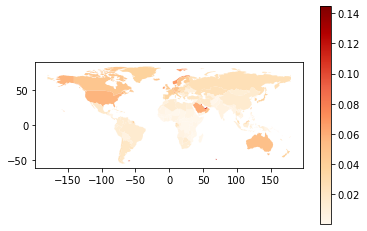

**NOTE** antarctica is a problem, please drop that row from the world dataset. To help you can check the unique values in a column as follows: `world['continent'].unique()`.

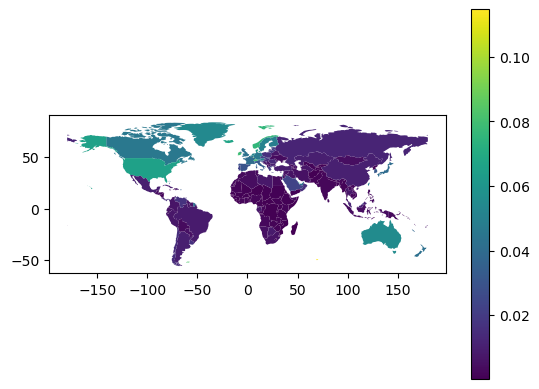

In [27]:
world = gpd.read_file("/Users/maryanashnitser/Desktop/Geospatial Programming II/Geopandas/Geo1_HW/geo1_data/world.geojson")

# YOUR CODE HERE
world.head()
world.drop(world[world['continent'] == 'Antarctica'].index, inplace=True)
world['gdp_per_capita'] = world['gdp_md_est'] / world['pop_est']
world.plot(column = 'gdp_per_capita', legend = True);

In [28]:
'''The following should run without and error'''
try:
    assert 'Antarctica' not in world['continent'].unique()
except AssertionError:
    raise AssertionError("Antartica must be removed from the plot")

try:
    assert 'gdp_per_capita' in world.columns
except AssertionError:
    raise AssertionError("There should be a column called 'gdp_per_capita'")

try:
    assert round(world.loc[0,'gdp_per_capita'],3) == 0.006
except AssertionError:
    raise AssertionError("The values of 'gdp_per_capita' do not appear to be correct")


In [29]:
"""Hidden tests"""


'Hidden tests'

### Part D: More Plots 
### part 1 (2.5 Points)
Create a plot with the following characteristics:

- starts from the world data that includes gdp per capita, and excludes Antarctica
- has no legend
- displays a green point roughly in the center of the USA at -100 degrees west and 40 degrees north - using your `createPointGpd` function 
- color scheme doesn't matter
- refer to [geopandas ploting examples](https://geopandas.org/en/stable/docs/user_guide/mapping.html)

It should look like this:
<!-- ![gdp point](geo1_data/gdp_point.png) -->
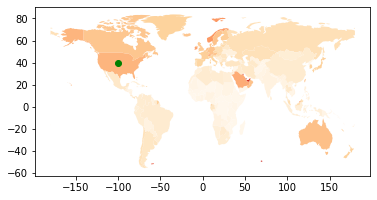


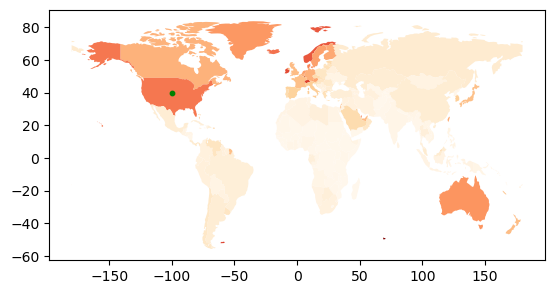

In [30]:
import matplotlib.pyplot as plt
# create a new figure
fig, ax = plt.subplots()

# add world data in axis ax
world.plot(ax=ax,column='gdp_per_capita', cmap='OrRd')
# YOUR CODE HERE
def createPointGpd(lat, lon):
    point = gpd.GeoDataFrame(geometry=[Point(lon, lat)], crs="EPSG:4326")  
    return point

point = createPointGpd(40, -100)
point.plot(ax = ax, color = 'green', markersize = 10)

plt.show();

### part 2 (2.5 Points)

Create a plot with the following characteristics:

- starts from the world data that includes gdp per capita, and excludes Antarctica
- has no legend
- displays a polygon panning -130 to -60 degrees west and 25 to 50 degrees north - using your `createPolyGpd` function 
- the polygon should have `color='none', edgecolor='black'`
- color scheme doesn't matter
- refer to [geopandas ploting examples](https://geopandas.org/en/stable/docs/user_guide/mapping.html)

It should look like this:
<!-- ![gdp point](geo1_data/gdp_poly2.png) -->

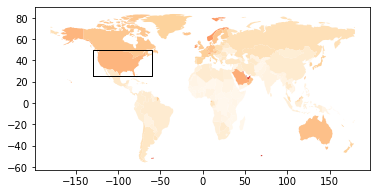

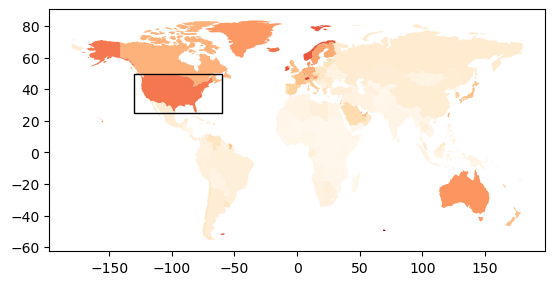

In [31]:

# create new figure to work from 
fig, ax = plt.subplots()
world.plot(ax=ax,column='gdp_per_capita', cmap='OrRd')

    
def createPolyGpd(list_of_points):
  

    point1 = Point(-130, 25)
    point2 = Point(-60, 25)
    point3 = Point(-60, 50)
    point4 = Point(-130, 50)
    


    poly = Polygon([point1, point2, point3, point4])
    poly_gdf = gpd.GeoDataFrame(geometry=[poly], crs="EPSG:4326")  
    return poly_gdf

list_of_points = [(-130, 25), (-60, 25), (-60, 50), (-130, 50)]
poly_gdf = createPolyGpd(list_of_points)
poly_gdf.plot(ax = ax, color = 'none', edgecolor = 'black', linewidth = 1)
# create plot of world, then add polygon 
# YOUR CODE HERE

plt.show();

### part 3 (2.5 Points)

Starting with your code from part 2, reproject everything into World Mercator EPSG = 3395 using the function `.to_crs()`, [see help here](https://geopandas.org/en/stable/docs/user_guide/projections.html).

It should look like this:
<!-- ![gdp point](geo1_data/gdp_poly_merc.png) -->

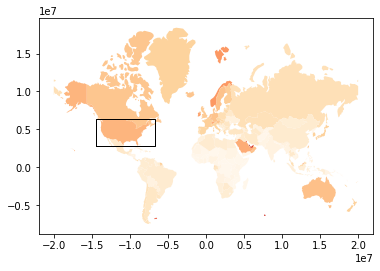

**NOTE** the change in the axis values are now measured in meters, hence *10^7

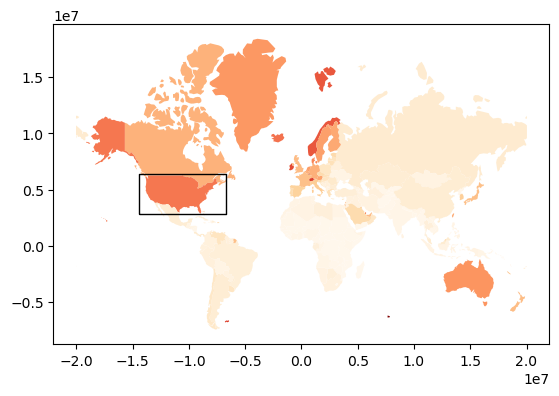

In [32]:

# create new figure to work from 
fig, ax = plt.subplots()

world.plot(ax=ax,column='gdp_per_capita', cmap='OrRd')

    
def createPolyGpd(list_of_points):
  

    point1 = Point(-130, 25)
    point2 = Point(-60, 25)
    point3 = Point(-60, 50)
    point4 = Point(-130, 50)
    


    poly = Polygon([point1, point2, point3, point4])
    poly_gdf = gpd.GeoDataFrame(geometry=[poly], crs="EPSG:4326")  
    return poly_gdf

list_of_points = [(-130, 25), (-60, 25), (-60, 50), (-130, 50)]
poly_gdf = createPolyGpd(list_of_points)
poly_gdf.plot(ax = ax, color = 'none', edgecolor = 'black', linewidth = 2)

world = world.to_crs("EPSG:3395")
world.plot(ax=ax, column='gdp_per_capita', cmap='OrRd')

poly_gdf = createPolyGpd(list_of_points)
poly_gdf = poly_gdf.to_crs('EPSG:3395')  # Reproject to match world dataset
poly_gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=1)


plt.show();